In [16]:
import pandas as pd
from datetime import timedelta
%pylab inline

df_goog = pd.read_csv('../../assets/datasets/goog.csv')

Populating the interactive namespace from numpy and matplotlib


Take a high-level look at the data. Describe it. What are we looking at? Hint: We can use our `plot` function to provide a good visual.

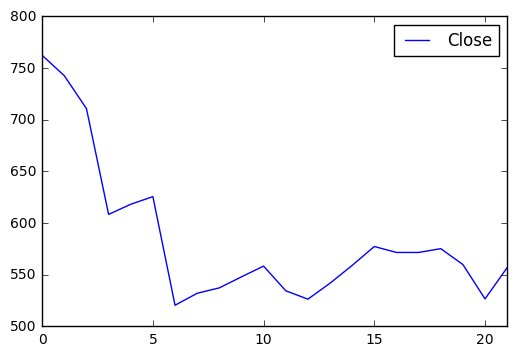

In [17]:
df_goog.plot(y = "Close")

In [18]:
df_goog.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [19]:
df_goog.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-01,747.109985,775.955017,745.630005,762.369995,2519600,762.369995
1,2015-11-02,711.059998,762.708008,705.849976,742.599976,1795300,742.599976
2,2015-10-01,608.369995,730.000000,599.849976,710.809998,2337100,710.809998
3,2015-09-01,602.359985,650.900024,589.380005,608.419983,2398400,608.419983
4,2015-08-03,625.340027,674.900024,565.049988,618.250000,2661600,618.250000


In [20]:
df_goog.describe(include = 'all')

,Date,Open,High,Low,Close,Volume,Adj Close
count,22,22.000000,22.000000,22.000000,22.000000,2.200000e+01,22.000000
unique,22,NaN,NaN,NaN,NaN,NaN,NaN
top,2014-07-01,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,575.890686,609.268155,552.366753,584.801935,2.019245e+06,584.801935
std,NaN,56.597440,71.429837,64.162213,69.206444,6.682940e+05,69.206444
min,NaN,524.729980,541.412415,487.562195,520.510010,2.530000e+04,520.510010
25%,NaN,538.548111,565.495086,516.023072,538.463135,1.685675e+06,538.463135
50%,NaN,560.617554,581.727631,534.417419,559.487549,1.856900e+06,559.487549
75%,NaN,577.745132,639.383209,565.040634,600.655640,2.387900e+06,600.655640


In [21]:
df_goog.shape

(22, 7)

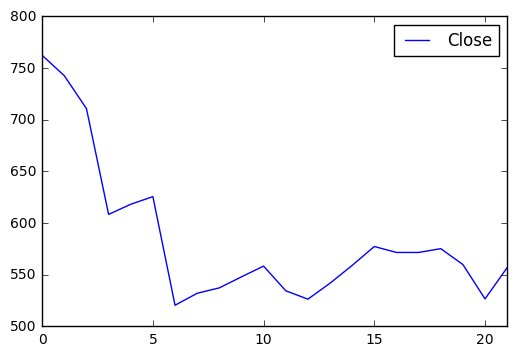

In [22]:
df_goog.plot(y = 'Close')

In [23]:
df_goog.min()

Date         2014-03-27
Open             524.73
High            541.412
Low             487.562
Close            520.51
Volume            25300
Adj Close        520.51
dtype: object

Looking a little deeper, let's gauge the integrity of our data. Is there any cleaning we can do? 

In [24]:
df_goog.Date = pd.to_datetime(df_goog.Date)

Let's examine the Date column. We should probably make it the index for our DataFrame, as we need to order the data by time. Doing this will result in 6 Series objects indexed by DateTime- literal Time Series!

In [25]:
df_goog = df_goog.set_index("Date")

We need to convert the string to a DateTime object. Pandas has a built in function for this! Easy peasy. We should also ensure that the dates are sorted.

In [26]:
df_goog['change'] = df_goog.Close - df_goog.Open

Let's add some more columns with useful data extracted from the DateTime index.

Let's walk through adding a dummy variable to flag days where the Close price was higher than the Open price

We can use the DateTime object to access various different cuts of data using date attributes. For example, if we wanted to get all of the cuts from 2015, we would do as such:

In [29]:
df_goog['month'] = df_goog.index.month
df_goog.head(6)

,Open,High,Low,Close,Volume,Adj Close,change,month
Date,,,,,,,,
2015-12-01,747.109985,775.955017,745.630005,762.369995,2519600,762.369995,15.260010,12
2015-11-02,711.059998,762.708008,705.849976,742.599976,1795300,742.599976,31.539978,11
2015-10-01,608.369995,730.000000,599.849976,710.809998,2337100,710.809998,102.440003,10
2015-09-01,602.359985,650.900024,589.380005,608.419983,2398400,608.419983,6.059998,9
2015-08-03,625.340027,674.900024,565.049988,618.250000,2661600,618.250000,-7.090027,8
2015-07-01,524.729980,678.640015,515.179993,625.609985,2955600,625.609985,100.880005,7


Let's recall the TimeDelta object. We can use this to shift our entire index by a given offset.

On your own, try to shift the entire time series **both** forwards and backwards by the following intervals:
- 1 hour
- 3 days
- 12 years, 1 hour, and 43 seconds

In [ ]:
offset1 = timedelta(hours = 1)
offest2 = timedelta(days=3)
offset3 = timedelta(days= ((365*12)+3), hours=1, )
df_goog.index = df_goog.index - pd.DateOffset(years = 12)

## Discussion: Date ranges and Frequencies

In [31]:
df_goog.resample('A').mean()

,Open,High,Low,Close,Volume,Adj Close,change,month
Date,,,,,,,,
2014-12-31,560.552545,578.692615,531.819424,556.669513,1779190,556.669513,-3.883032,7.5
2015-12-31,588.672470,634.747772,569.489528,608.245621,2219291,608.245621,19.573151,6.5


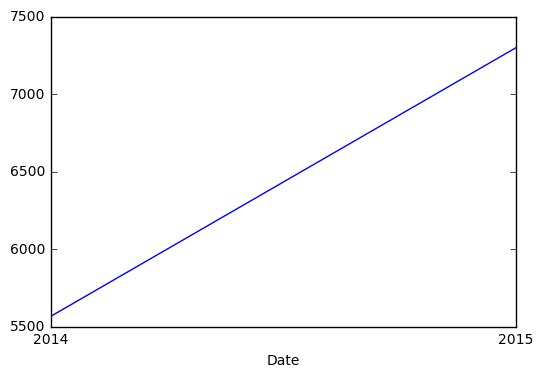

In [32]:
df_goog.Close.resample('A').sum().plot()

In [34]:
df_goog.Close.asfreq('D', method='backfill')

Series([], Freq: D, Name: Close, dtype: float64)

Note that `asfreq` gives us a `method` keyword argument. Backfill, or bfill, will propogate the last valid observation forward. In other words, it will use the value preceding a range of unknown indices to fill in the unknowns. Inversely, pad, or ffill, will use the first value succeeding a range of unknown indices to fill in the unknowns.

Now, let's discuss the following points:
- What does `asfreq` do?
- What does `resample` do?
- What is the difference?
- When would we want to use each?

We can also create our own date ranges using a built in function, `date_range`. The `periods` and `freq` keyword arguments grant the user finegrained control over the resulting values. To reset the time data, use the `normalize=True` directive.

**NOTE:** See Reference B in the lesson notes for all of the available offset aliases

We are also given a Period object, which can be used to represent a time interval. The Period object consists of a start time and an end time, and can be created by providing a start time and a given frequency.

Each of these objects can be used to alter and access data from our DataFrames. We'll try those out in our Independent Practice in a moment.